In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/Iris.csv")

In [2]:
print("Shape of the data:")
print(data.shape)
print("\nData Type:")
print(type(data))
print("\nFirst 3 rows:")
print(data.head(3))

Shape of the data:
(150, 6)

Data Type:
<class 'pandas.core.frame.DataFrame'>

First 3 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa


Exercise 2 

In [3]:
print("\nKeys of Iris dataset:")
print(data.keys())
print("\nNumber of rows and columns of Iris dataset:")
print(data.shape) 


Keys of Iris dataset:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Number of rows and columns of Iris dataset:
(150, 6)


Exercise 3

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Exercise 4

In [5]:
eye = np.eye(4)
print("NumPy array:\n", eye)
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Exercise 5

In [10]:
print(data.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Exercise 6

In [11]:
print("Observations of each species:")
print(data['Species'].value_counts()) 

Observations of each species:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


Exercise 7

In [15]:
#Had to set the first col as index to remove it
print("Original Data:")
print(data.head())
data.set_index('SepalLengthCm', inplace=True)
print("After removing id column:")
print(data.head()) 

Original Data:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
After removing id column:
               Id  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
SepalLengthCm                                                            
5.1             1           3.5            1.4           0.2  Iris-setosa
4.9             2           3.0            1.4           0.2  Iris-setosa
4.7             3           3.2            1.3           0.2  Iris-setosa
4.6             4           3.1            1.5           0.2  Iris-setosa
5.0             5           3.6            1.4       

Exercise 8

In [18]:
x = [data.iloc[0][0], data.iloc[0][1], data.iloc[0][2], data.iloc[0][3]]
print(x) 

[1, 3.5, 1.4, 0.2]


VISUALIZATION

Exercise 1

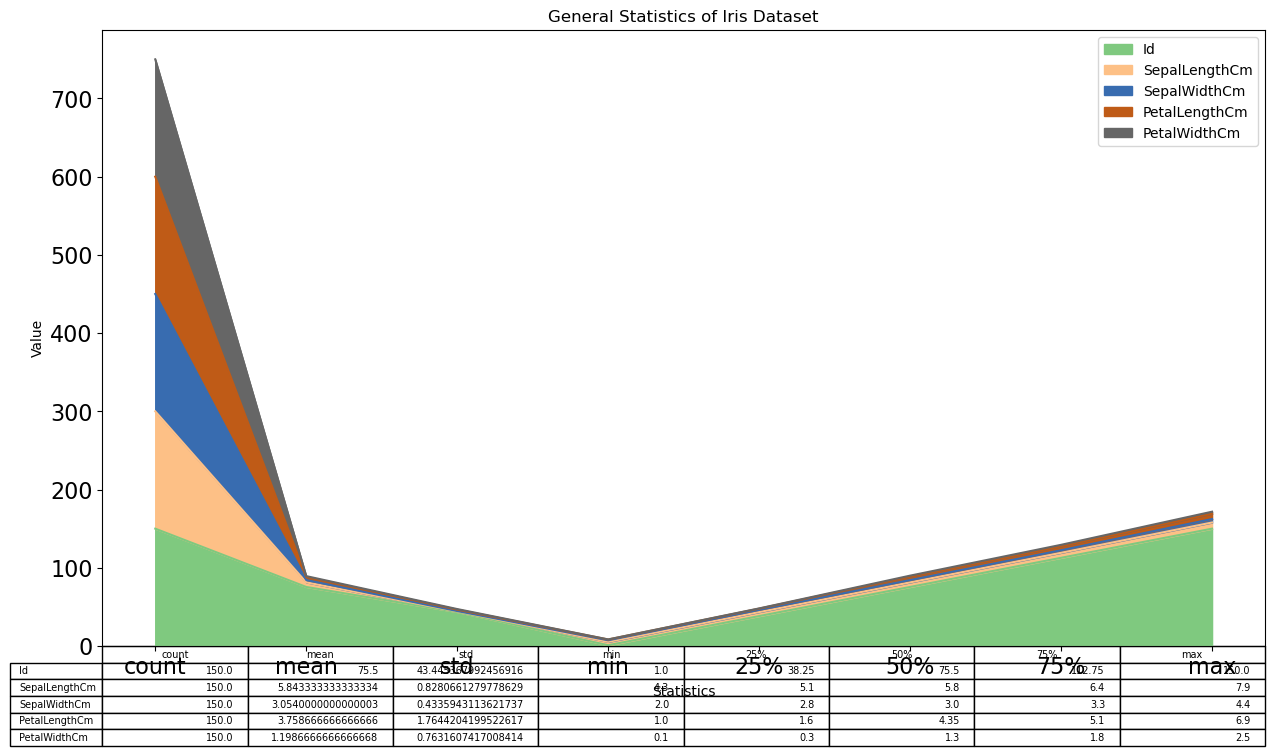

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/Iris.csv")
iris.describe().plot(kind = "area",fontsize=16, figsize = (15,8), table = True, colormap="Accent")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")
plt.show()

Exercise 2

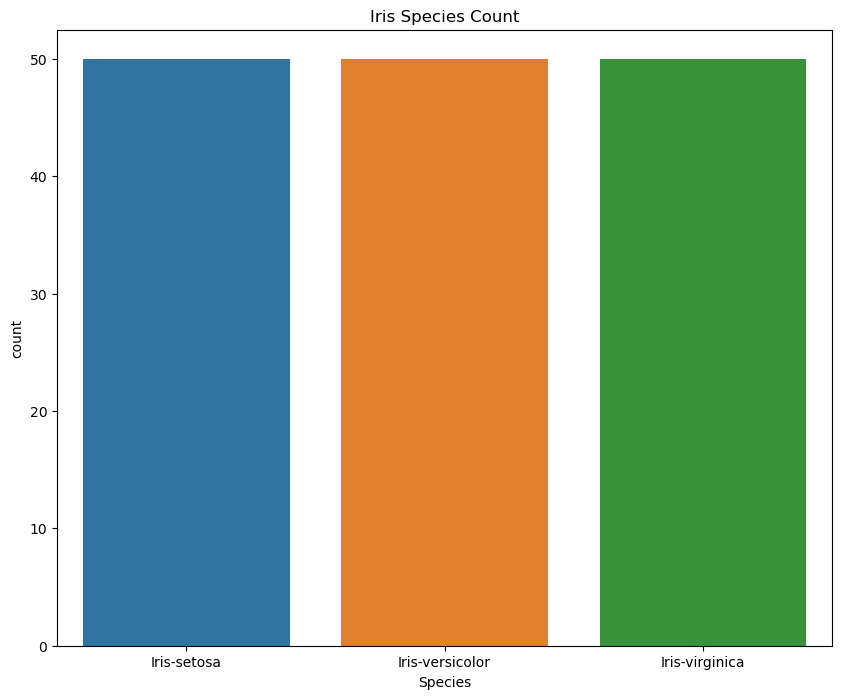

In [28]:
iris = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/Iris.csv")
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Species',data=iris)
plt.title("Iris Species Count")
plt.show()

Exercise 3

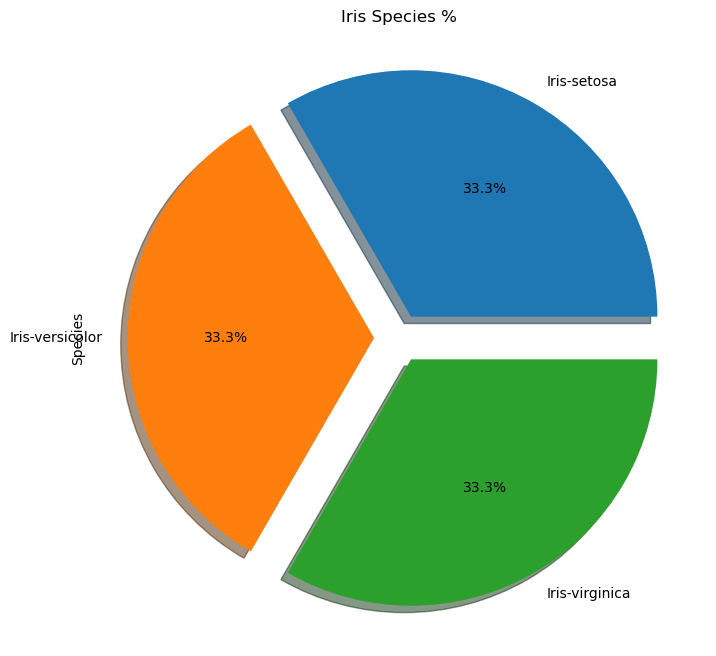

In [31]:
ax=plt.subplots(1,1,figsize=(10,8))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

Exercise 4

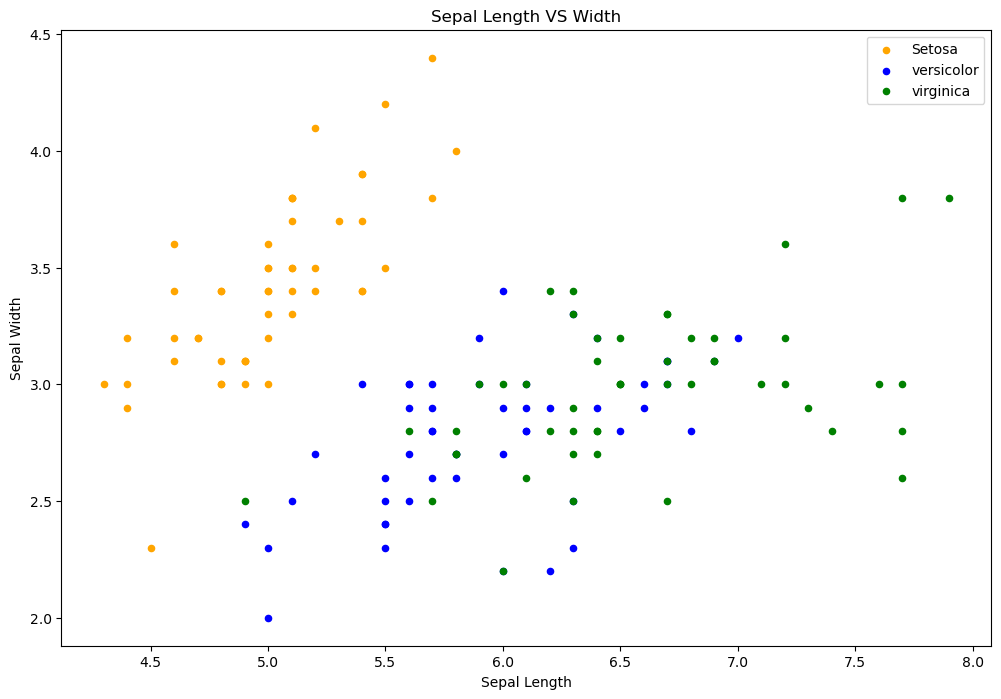

In [38]:
iris = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/Iris.csv")
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Exercise 5

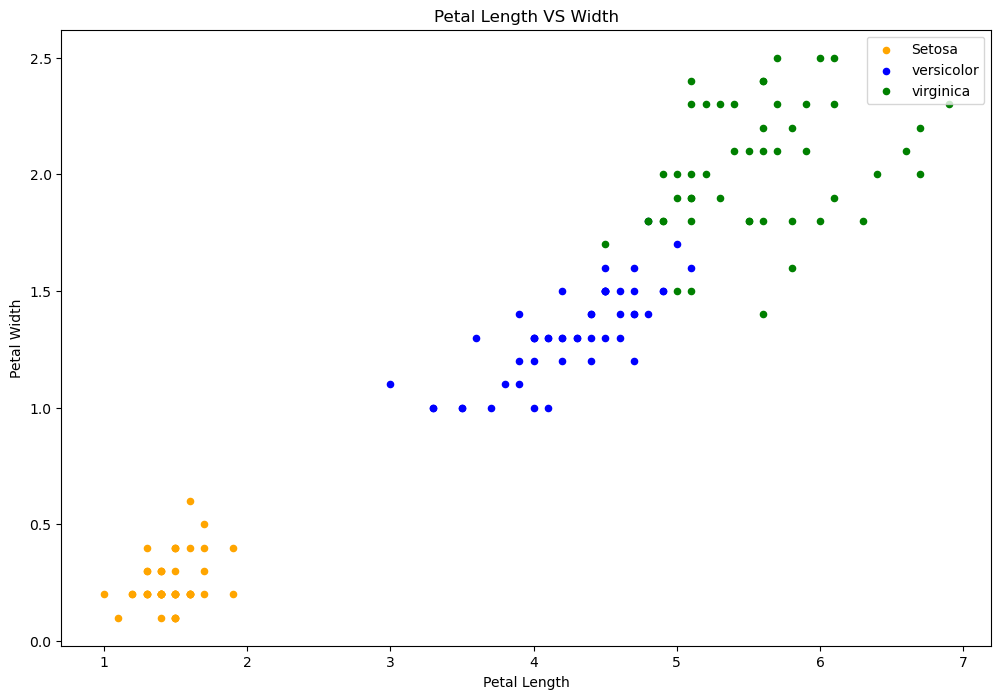

In [41]:
iris = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/Iris.csv")
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Exercise 6

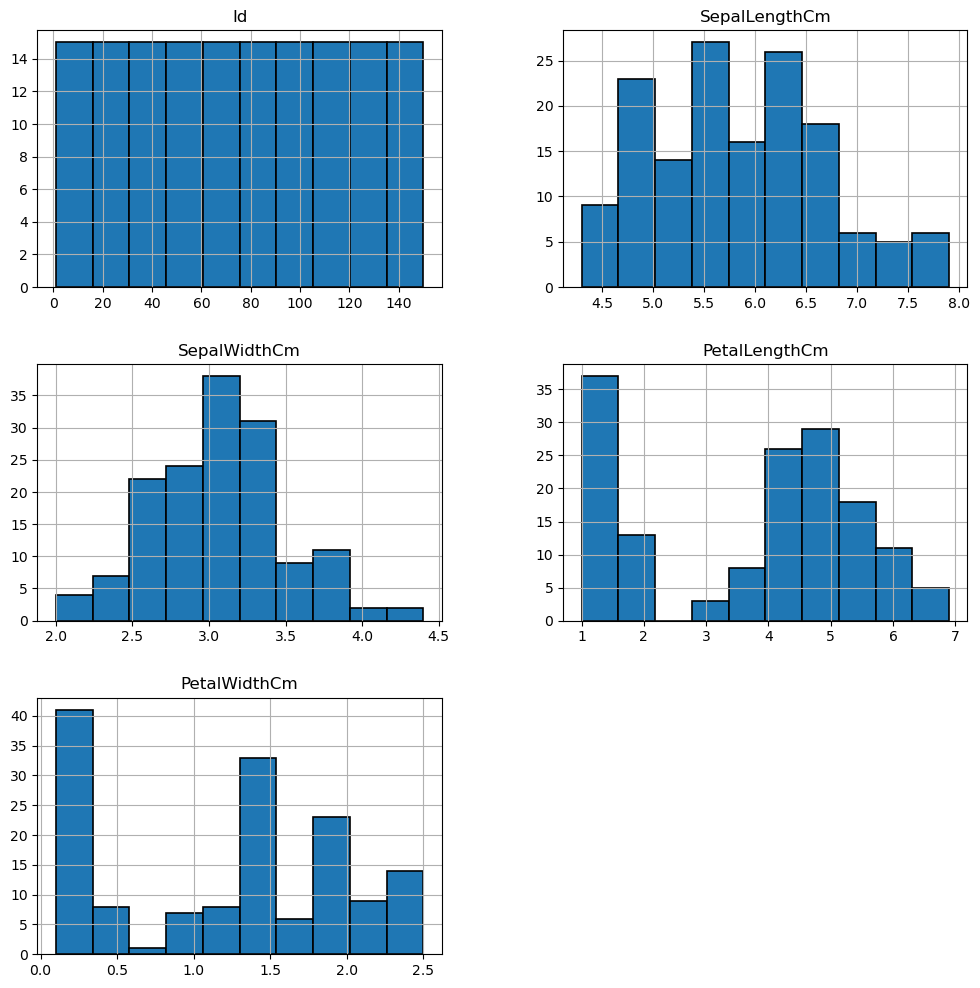

In [43]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Exericse 7

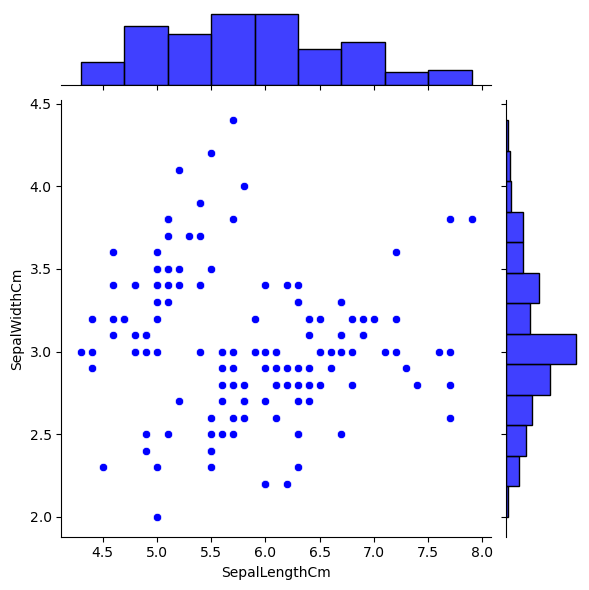

In [46]:
fig=sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, color='blue') 
plt.show()

Exercise 8

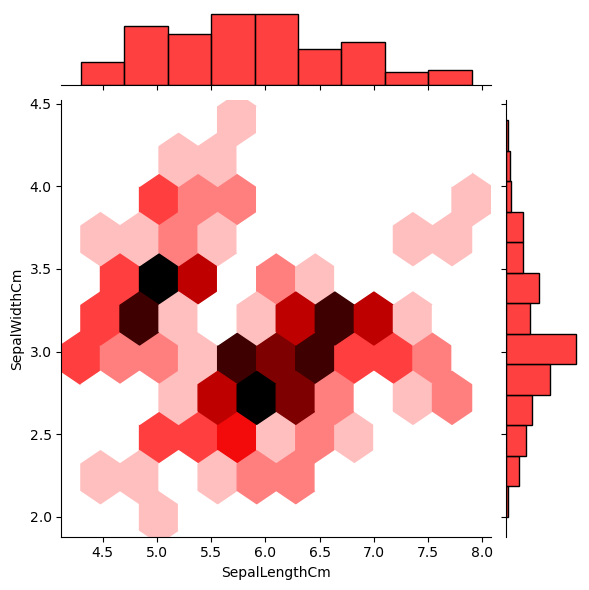

In [48]:
fig=sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', kind="hex", color="red", data=iris)
plt.show()

Exercise 9

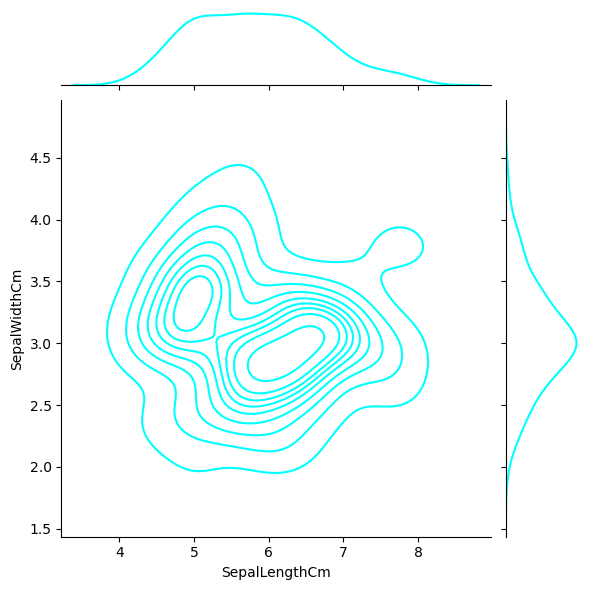

In [50]:
fig=sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', kind="kde", color='cyan', data=iris)  
plt.show()

Exercise 10

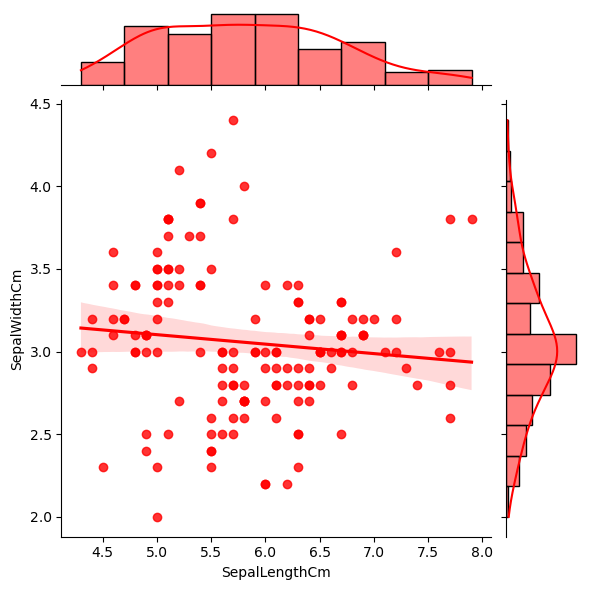

In [52]:
fig=sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', kind="reg", color='red', data=iris) 
plt.show()

Exercise 11

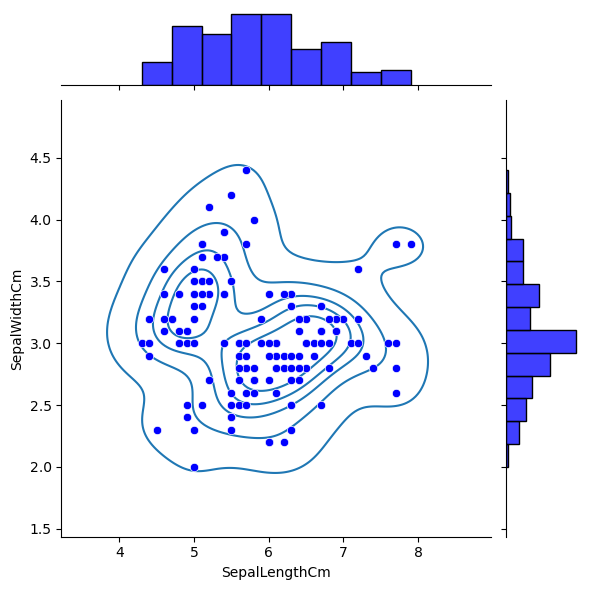

In [58]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.show()

Exercise 12

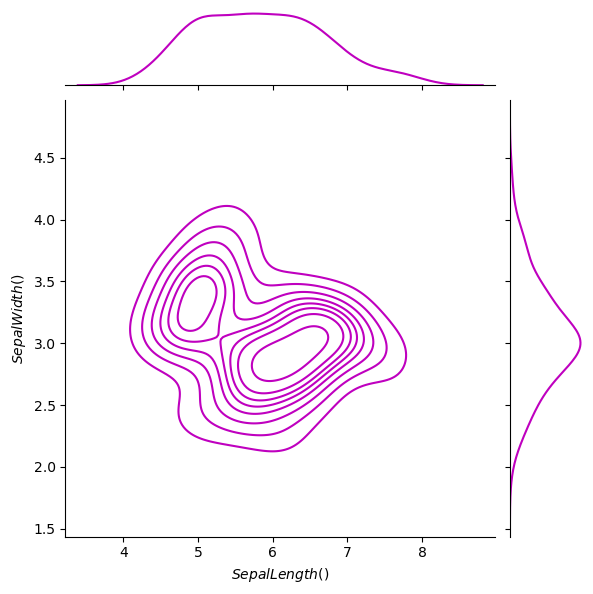

In [61]:
g = sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$SepalLength()$", "$SepalWidth()$") 
plt.show()

Exercise 13

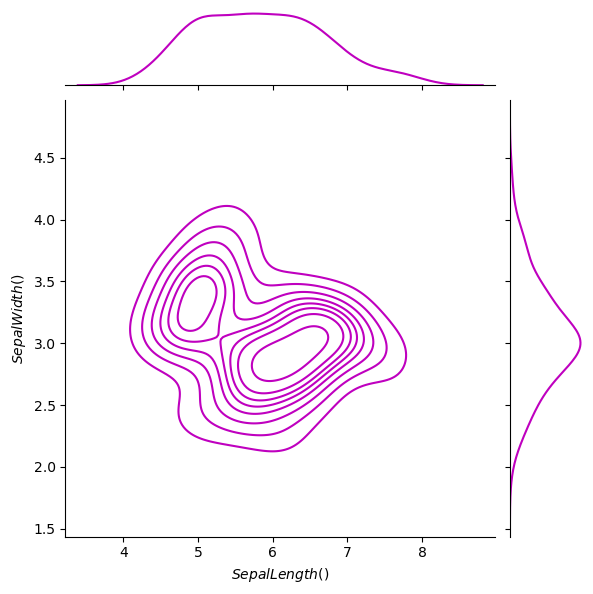

In [65]:
g = sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$SepalLength()$", "$SepalWidth()$") 
plt.show()

Exercise 14

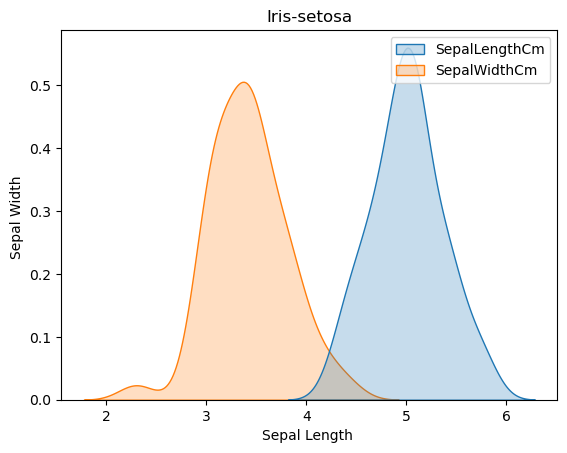

In [76]:
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']], color="plasma", fill=True, thresh=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')
plt.show()

Exercise 15

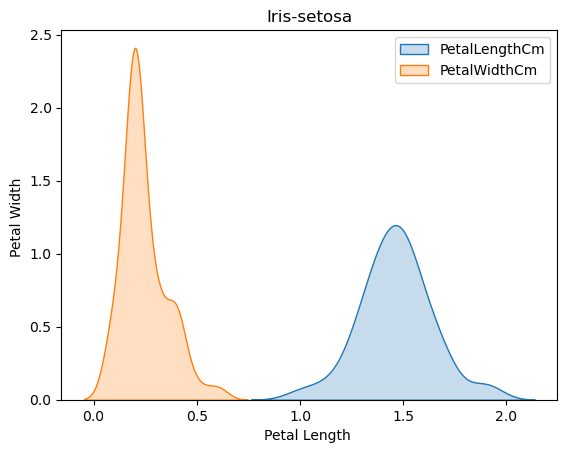

In [79]:
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['PetalLengthCm','PetalWidthCm']], color="plasma", fill=True, thresh=False)
plt.title('Iris-setosa')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')
plt.show()

Exercise 16

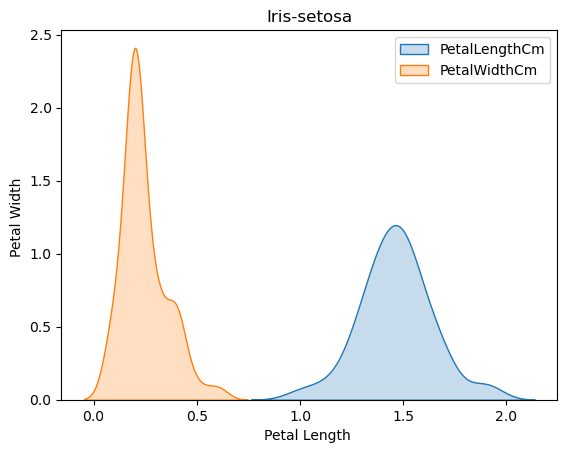

In [82]:
sns.kdeplot(data=sub[['PetalLengthCm','PetalWidthCm']],color="plasma", fill=True, thresh= 0.5)
plt.title('Iris-setosa')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')
plt.show()

Exercise 17

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
Id             1.000000       0.716676     -0.397729       0.882747
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000


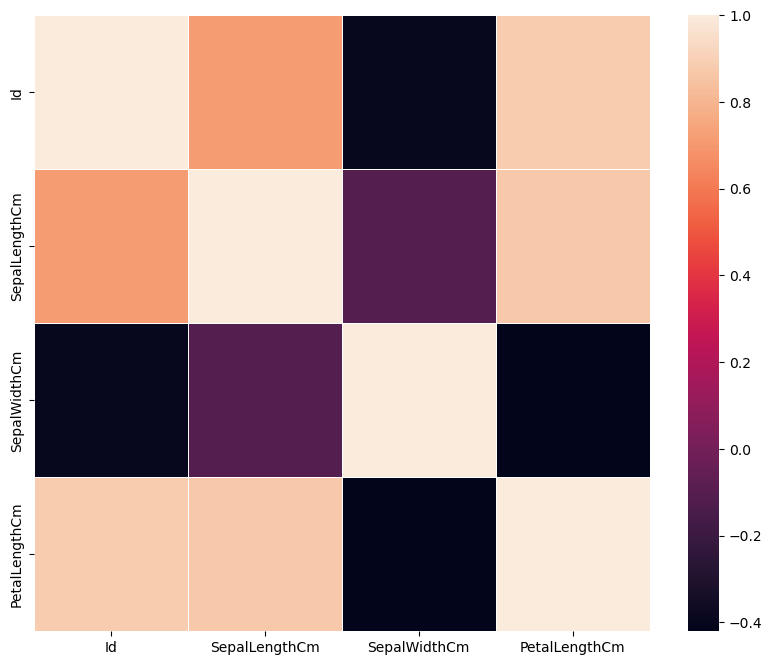

In [85]:
X = iris.iloc[:, 0:4]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype= bool), square=True, ax=ax, linewidths=.5)
plt.show() 

Exercise 18

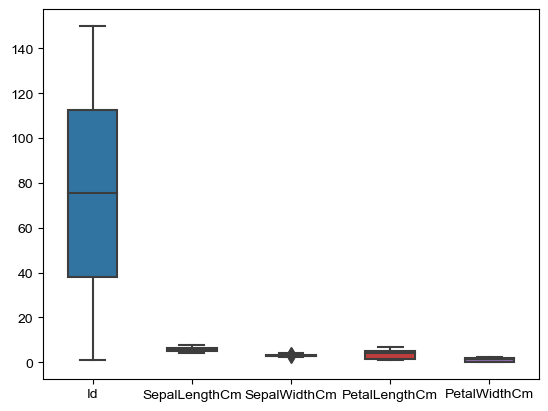

In [88]:
box_data = iris 
box_target = iris.Species 
sns.boxplot(data = box_data,width=0.5,fliersize=5)
sns.set(rc={'figure.figsize':(2,15)})

Exercise 19

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing

C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3641947242.py:25: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3641947242.py:26: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3641947242.py:27: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


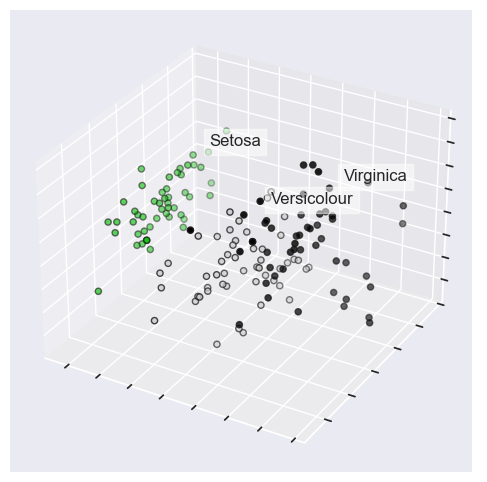

In [96]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
#Drop id column
iris = iris.drop('Id',axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = plt.axes(projection='3d')
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

K NEAREST NEIGHBORS

Exercise 1

In [98]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
print("Attributes:")
print(X)
print("\nLabels:")
print(y)

Attributes:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


Exercise 2

In [101]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("\n70% train data:")
print(X_train)
print(y_train)
print("\n30% test data:")
print(X_test)
print(y_test)


70% train data:
[[6.3 3.3 4.7 1.6]
 [5.5 3.5 1.3 0.2]
 [5.1 3.3 1.7 0.5]
 [6.7 3.  5.  1.7]
 [6.8 3.  5.5 2.1]
 [5.8 2.7 4.1 1. ]
 [6.3 2.3 4.4 1.3]
 [6.  2.9 4.5 1.5]
 [6.1 3.  4.6 1.4]
 [5.5 2.4 3.8 1.1]
 [7.7 2.8 6.7 2. ]
 [6.  3.  4.8 1.8]
 [5.  2.3 3.3 1. ]
 [5.5 2.6 4.4 1.2]
 [6.9 3.2 5.7 2.3]
 [6.9 3.1 5.1 2.3]
 [6.7 3.  5.2 2.3]
 [7.1 3.  5.9 2.1]
 [5.9 3.  5.1 1.8]
 [7.7 2.6 6.9 2.3]
 [4.8 3.  1.4 0.3]
 [5.1 2.5 3.  1.1]
 [6.1 2.9 4.7 1.4]
 [6.7 2.5 5.8 1.8]
 [6.1 3.  4.9 1.8]
 [5.1 3.5 1.4 0.3]
 [6.2 2.8 4.8 1.8]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [4.8 3.4 1.9 0.2]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.9 0.4]
 [6.4 2.9 4.3 1.3]
 [5.5 2.5 4.  1.3]
 [5.5 2.4 3.7 1. ]
 [6.6 2.9 4.6 1.3]
 [6.1 2.6 5.6 1.4]
 [5.7 2.8 4.1 1.3]
 [6.1 2.8 4.  1.3]
 [5.6 2.5 3.9 1.1]
 [5.1 3.8 1.5 0.3]
 [6.2 3.4 5.4 2.3]
 [4.6 3.4 1.4 0.3]
 [5.9 3.  4.2 1.5]
 [5.7 4.4 1.5 0.4]
 [5.1 3.5 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [6.4 3.2 5.3 2.3]
 [5.2 2.7 3.9 1.4]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 

Exercise 3

In [104]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Name = le.fit_transform(iris.Species)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("\n80% train data:")
print(X_train)
print(y_train)
print("\n20% test data:")
print(X_test)
print(y_test)


80% train data:
[[6.4 3.1 5.5 1.8]
 [5.  3.6 1.4 0.2]
 [6.3 2.7 4.9 1.8]
 [5.1 3.3 1.7 0.5]
 [6.7 3.  5.2 2.3]
 [6.3 3.3 4.7 1.6]
 [4.4 2.9 1.4 0.2]
 [7.2 3.2 6.  1.8]
 [5.  3.3 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [4.6 3.1 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.4 1.5 0.2]
 [5.6 2.5 3.9 1.1]
 [4.9 3.  1.4 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [5.2 4.1 1.5 0.1]
 [5.5 2.6 4.4 1.2]
 [5.  3.  1.6 0.2]
 [5.8 2.8 5.1 2.4]
 [4.9 3.1 1.5 0.1]
 [4.7 3.2 1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [6.4 3.2 5.3 2.3]
 [5.7 3.  4.2 1.2]
 [7.7 2.8 6.7 2. ]
 [6.3 2.8 5.1 1.5]
 [5.4 3.7 1.5 0.2]
 [6.9 3.1 5.1 2.3]
 [6.7 2.5 5.8 1.8]
 [6.4 2.9 4.3 1.3]
 [5.1 3.8 1.9 0.4]
 [6.3 3.4 5.6 2.4]
 [7.6 3.  6.6 2.1]
 [5.8 2.7 4.1 1. ]
 [6.2 2.8 4.8 1.8]
 [7.7 3.  6.1 2.3]
 [6.1 2.6 5.6 1.4]
 [6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [4.9 2.5 4.5 1.7]
 [5.  3.2 1.2 0.2]
 [5.6 3.  4.5 1.5]
 [6.8 3.  5.5 2.1]
 [5.5 2.5 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.3 3.7 1.5 0.2]
 [5.8 2.7 3.9 1.2]
 [5.2 3.4 1.4 0.2]
 [4.4 3.  1.3 

C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3702217906.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris.Name = le.fit_transform(iris.Species)


Exercise 4

In [106]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
'''
print("\n70% train data:")
print(X_train)
print(y_train)
print("\n30% test data:")
print(X_test)
print(y_test)
'''
#Create KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)

Response for test dataset:
[0 2 1 2 2 2 1 1 2 1 1 0 0 1 1 2 2 0 0 2 1 1 2 2 1 1 0 1 1 2 2 0 1 0 2 1 0
 2 2 0 1 0 0 0 0]


Exercise 5

In [108]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)   
# Calculate the accuracy of the model 
print("Accuracy of the model:")
print(knn.score(X_test, y_test))

Accuracy of the model:
0.9333333333333333


Exercise 6

In [110]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)   
# Calculate the accuracy of the model for different values of k
for i in np.arange(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    print("For k = %d accuracy is"%i,knn2.score(X_test,y_test))

For k = 1 accuracy is 0.9666666666666667
For k = 2 accuracy is 0.9333333333333333
For k = 3 accuracy is 0.9666666666666667
For k = 4 accuracy is 0.9666666666666667
For k = 5 accuracy is 1.0
For k = 6 accuracy is 0.9666666666666667
For k = 7 accuracy is 1.0
For k = 8 accuracy is 0.9666666666666667
For k = 9 accuracy is 1.0


Exercise 7

For k = 1 accuracy is 0.9333333333333333
For k = 2 accuracy is 0.9333333333333333
For k = 3 accuracy is 0.9333333333333333
For k = 4 accuracy is 0.9333333333333333
For k = 5 accuracy is 0.9
For k = 6 accuracy is 0.9
For k = 7 accuracy is 0.9
For k = 8 accuracy is 0.9
For k = 9 accuracy is 0.9

Visual presentation: Various values of n for K-Nearest nerighbours:


C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3649205535.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3649205535.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3649205535.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
C:\Users\cbruc\AppData\Local\Temp\ipykernel_33020\3649205535.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.

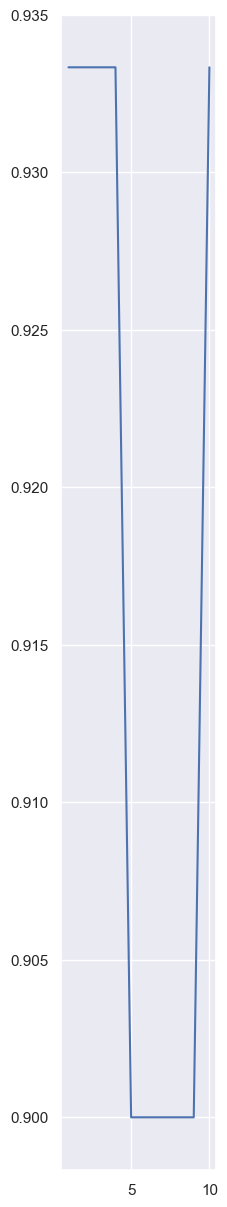

In [112]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)   
a_index=list(range(1,11))
a=pd.Series()
# Calculate the accuracy of the model for different values of k
for i in np.arange(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    print("For k = %d accuracy is"%i,knn2.score(X_test,y_test))
# Visual presentation: Various values of n for K-Nearest nerighbours
print("\nVisual presentation: Various values of n for K-Nearest nerighbours:")    
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)

Exercise 8

Preliminary model score:
0.9


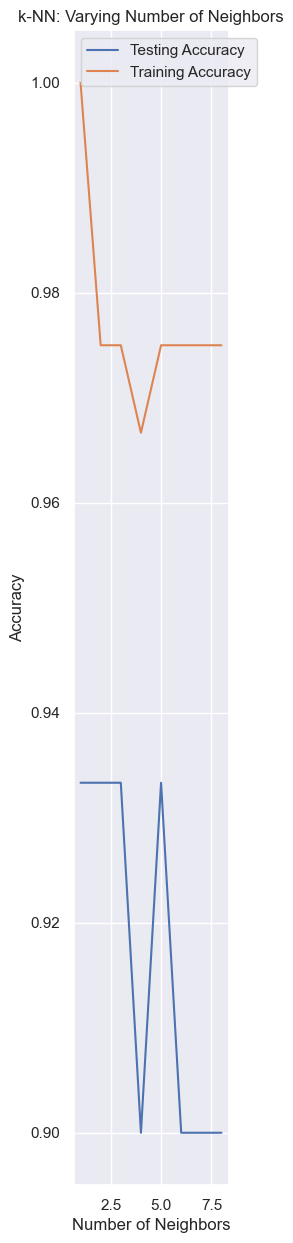

In [114]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

print("Preliminary model score:")
print(knn.score(X_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

LOGISTIC REGRESSSION IN SCI KIT LEARN

Exericse 1

In [119]:
print('Iris-setosa')
setosa = data['Species'] == 'Iris-setosa'
print(data[setosa].describe())
print('\nIris-versicolor')
setosa = data['Species'] == 'Iris-versicolor'
print(data[setosa].describe())
print('\nIris-virginica')
setosa = data['Species'] == 'Iris-virginica'
print(data[setosa].describe())

Iris-setosa
             Id  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000     50.000000      50.000000      50.00000
mean   25.50000      3.418000       1.464000       0.24400
std    14.57738      0.381024       0.173511       0.10721
min     1.00000      2.300000       1.000000       0.10000
25%    13.25000      3.125000       1.400000       0.20000
50%    25.50000      3.400000       1.500000       0.20000
75%    37.75000      3.675000       1.575000       0.30000
max    50.00000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000     50.000000      50.000000     50.000000
mean    75.50000      2.770000       4.260000      1.326000
std     14.57738      0.313798       0.469911      0.197753
min     51.00000      2.000000       3.000000      1.000000
25%     63.25000      2.525000       4.000000      1.200000
50%     75.50000      2.800000       4.350000      1.300000
75%     87.75000    

Exercise 2

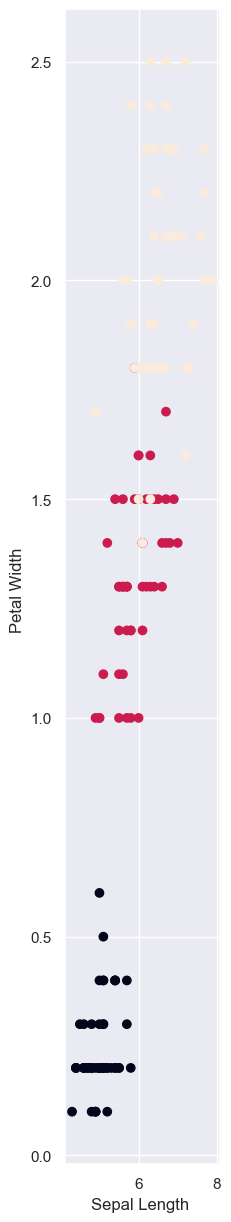

In [121]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Name = le.fit_transform(iris.Name)
x = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
plt.scatter(x[:,0], x[:, 3], c=y)
plt.xlabel('Sepal Length ')
plt.ylabel('Petal Width ')
plt.show()

Exercise 3

In [123]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9666666666666667


C:\Users\cbruc\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
